# Método de Runge-Kutta

### Ecuaciones diferenciales ordinarias
<section class="post-meta">
Carlos Ruestes, Cristián Sánchez
</section>
Última revisión: Noviembre - 2020
___

Durante el cursado de sus respectivas carreras, tendrán la oportunidad de enfrentar (en más oportunidades de las que podrían desear) la resolución de ecuaciones diferenciales en forma analítica. En otros ámbitos y dependiendo del problema en cuestión, la resolución de ecuaciones diferencias ordinarias (EDOs) se realiza empleando el método de Euler. Este método es muy popular entre docentes y alumnos debido a que resulta sencillo de entender y de implementar. Sin embargo, a efecto de estudios científicos, el método de Euler resulta impreciso comparado con otros. 

En este curso utilizaremos, entre otros métodos, el de Runge-Kutta. Entre sus virtudes podemos mencionar que es razonablemente eficiente en términos de tiempo computacional, y a la vez ofrece una precisión decente en su versión de cuarto orden. Presentaremos el método en su versión más simple, habiendo diferentes implementaciones y mejoras. 

## Repasando el método de Euler

Consideremos la EDO (no lineal),
$$
\dot{x}(t) = \cos(x(t)) + \sin(t), \qquad \dot{x}\equiv\frac{\textrm{d}x(t)}{\textrm{d}t}
$$

con condiciones iniciales $x(t_0) = 0, t_0 = 0$. El método de Euler (explícito) resuelve el problema discretizando las variables de forma tal que:  

\begin{align*}
t     & \rightarrow t_n     \qquad\equiv t_0 + n\cdot\Delta t,\\[1.0em]
x(t)  & \rightarrow x(t_n)  \quad\equiv x_n                 ,\\[1.0em]
n     & = 0,1,\ldots,N;                 
\end{align*}

Entonces, el valor de la función en $x_{n+1}$ puede ser aproximado mediante el valor anterior más el cambio (derivada) en dicho punto multiplicado por la distancia en el tiempo $\Delta t$ entre $x_n$ y $x_{n+1}$. Esto es,

$$
x_{n+1} = x_n + (\Delta t) \cdot \dot{x}_n, \qquad \Delta t = \frac{t_N - t_0}{N} \equiv h
$$


Para este problema en particular, tenemos $\dot{x}_n(t_n)$, tal que puede ser insertada directamente en la fórmula de Euler obteniendo,

$$
x_{n+1} = x_n + h [\cdot \cos(x_n) + \sin(t_n)]
$$

Con esto tenemos todo para resolver este problema. Pueden encontrar información más detallada en la bibliografía.

In [4]:
%matplotlib inline
import numpy as np               # Carga numpy
import matplotlib.pyplot as plt  # Carga módulo para gráficos
import time                      # Carga módulo para tiempos

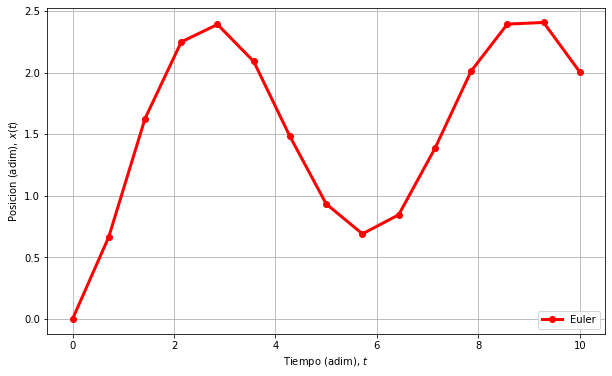

In [5]:

# Implementación rápida para resolver el problema dado
# Nota: Las soluciones son dependientes de los valores iniciales

# Intentemos ajustar 'N' para ver como converge la solución numérica

t0   = 0.0
tN   = 10.0
N    = 15
t    = np.linspace(t0,tN,N)
x_Eu = np.zeros(N) ## Euler
h    = (tN-t0)/N

# Condiciones iniciales:
x_Eu[0] = 0

for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu,'-ro',linewidth=3.0, label=r'Euler')
plt.ylabel(r'Posicion (adim), $x(t)$')
plt.xlabel(r'Tiempo (adim), $t$')
plt.legend(loc=4) # 'loc' posicion del texto / leyenda 
plt.grid()
plt.show()

Haciendo rápidamente un análisis de errores, podemos ver que el error de truncamiento local en <i>uno y cada </i>uno de los pasos es proporcional al paso de tiempo al cuadrado $h^2 = (\Delta t)^2$. Esto se hace mediante una expansión en series de Taylor (Cálculo II) de la función alrededor de $t+h$

\begin{align*}
\text{Exacto:} & \qquad x(t + h) =  x(t) + h\dot{x} + \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots  \\[1.2em]
\text{Euler:} & \qquad x(t + h) \approx  x(t) + h\dot{x}\\[1.2em]
\text{Error:} & \qquad e = \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots
\end{align*}

Ahora bien, iterando un total de $N=\frac{t_N - t_0}{h}\propto h^{-1}$ veces, el error global total es  $E = N\cdot e \propto h$. <strong>Ahora la pregunta es: ¿Podemos obtener una mejor solución aproximada para el mismo paso de tiempo?</strong>. 

## Mejorando el método de Euler

El concepto subyacente al método de Runge-Kutta, que veremos en un unos minutos, se basa en los mismos concepctos básicos que el método de Euler. Consideremos ahora que aplicamos nuevamente el método de Euler con un cambio simple pero importante. Esta vez no usaremos la derivada en $x_{n+1}$, sino que usaremos la derivada en el punto medio $x_{m}=\frac{x_{n+1}+x_n}{2}$, refiriendonos al mismo como el <i><u>test-point</u></i>. Uno puede entonces computar un valor $x_{n+1}$ más preciso usando la información de la derivada en el punto ($\dot{x}_m$) del intervalor $h$ entre $x_n$ y $x_{n+1}$. Esto es,

\begin{align*}
x_{n+1} &= x_n + h\cdot \dot{x}_m \\[1.2em]
        &= x_n + h\cdot [\cos(x_m) + \sin(t_m)] \\[0.8em]
        &= x_n + h\cdot \left[\cos\left(x_n + \frac{h \dot{x}_n}{2}\right) + \sin\left(t_n+\frac{h}{2} \right)\right] \\[1.0em]
        &= x_n + h\cdot \left[\cos\left(x_n + \frac{h}{2}[\cos(x_n)+\sin(t_n)]\right) + \sin\left(t_n+\frac{h}{2} \right)\right]
\end{align*}

Comparemos esta solución con la anterior.

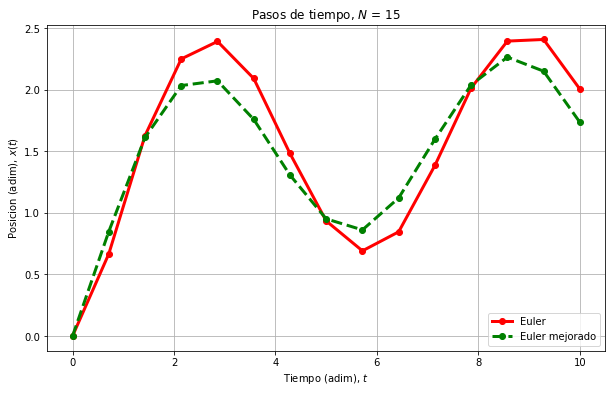

In [6]:
x_imp = np.zeros(N) 

for n in range(0,N-1):
    x_imp[n+1] = x_imp[n] + h * ( np.cos(x_imp[n]+(h/2.0)*(np.cos(x_imp[n]) + np.sin(t[n]))) + np.sin(t[n]+h/2.0)  )

plt.figure(figsize=(10,6))
plt.plot(t,x_Eu ,'-ro' ,linewidth=3.0,label=r'Euler')
plt.plot(t,x_imp,'--go',linewidth=3.0,label=r'Euler mejorado')
plt.ylabel(r'Posicion (adim), $x(t)$')
plt.xlabel(r'Tiempo (adim), $t$')
plt.title(r'Pasos de tiempo, $N$ = %i' % N)
plt.legend(loc=4)
plt.grid()
plt.show()

La nueva aproximación es significativamente diferente a la solución del método original (usando $N=15$). Lo que acabamos de implementar, es un método conocido como <i>Método de Euler mejorado</i> o <i>Método de punto medio</i> para EDOs. Este método también es conocido como <strong>Método de Runge-Kutta de segundo orden</strong>. Si uno asume que el método mejorado es más preciso, podemos ver que el </i>método original produce sobreestimaciones/subestimaciones en los puntos donde las derivadas primeras tienen mayor tasa de cambio</i>. 

Haciendo una comparación rápida de los errores tenemos, expandiendo en serie de Taylor alrededor de $(t+h/2)$. La aproximación resulta

$$
x(t+h) \approx x(t) + h\dot{x}(t+h/2)
$$

donde expandiendo en $\dot{x}(t+h/2)$ tenemos 

$$
\dot{x}(t+h/2) = \dot{x}(t) + (h/2)\ddot{x} + \frac{(h/2)^2}{2}\dddot{x} + \mathcal{O}(h^3)
$$

Como hicimos para el método de Taylor estándar, comparamos nuestro esquema mejorado con la expansión de Taylor exacta ,

\begin{align*}
\text{Exacto:} & \qquad x(t + h) =  x(t) + h\dot{x} + \frac{h^2}{2}\ddot{x} + \frac{h^3}{6}\dddot{x} + \ldots  \\[1.2em]
\text{Impr. E.:} & \qquad x(t + h) \approx  x(t) + h[\dot{x}(t) + (h/2)\ddot{x}]\\[1.2em]
\text{Error:} & \qquad e = \frac{h^3}{6}\dddot{x} + \mathcal{O}(h^4)
\end{align*}

Esto implica un error global $E=N\cdot e \propto h^2$, que da su nombre al método como de segundo orden en $h$. Ahora nos engolosinamos: <strong>¿Podemos hacerlo mejor?</strong>

## El método de Runge-Kutta general (de cuarto orden)

Lo que Euler hizo fue estimar $x_{n+1}$ usando $x_n$ y $\dot{x}_n$. Lo que acabamos de hacer fue estimar $x_{n+1}$ usando $x_n$ y la derivada del punto intermedio $x_m$. Exploremos la siguiente idea: <i><strong>¿Sería posible usar un punto de prueba/evaluación similar para calcular la derivada del punto de prueba en cuestión?</strong></i> 

La respuesta es <strong>si</strong>. De hecho, podemos hacerlo aún mejor: Podemos generar un punto de prueba/evaluación para el punto de prueba/evaluación, y así sucesivamente! De hecho, el <strong>método de Runge-Kutta de cuarto orden</strong> usa tres de dichos puntos de prueba y es el método de Runge-Kutta más utilizado. Cualquiera podría estar preguntándose por que no utilizamos 5, 10 o más de dichos puntos, y la respuesta es sencilla: Nada es gratis, y la ganancia en precisión baja rápidamente a partir del cuarto orden, a expensas de mayor costo computacional. Esto es, si una alta precisión resulta tan importante que requeriría un Runge-Kutta de décimo orden, entonces es preferible reducir el paso de tiempo $h$, que incrementar el orden del método. 

Para el alumno interesado, hay otros métodos más rápidos, sofisticados y precisos para un mismo $h$, pero como se pueden imaginar, de implementación más compleja. Por ejemplo <i>Extrapolación de Richardson</i>, <i>Método de Bulirsch-Stoer </i>, <i>Método Predictor-Corrector</i>, etc.

A título informativo, y antes de aplicar el método de cuarto orden al problema original, se mostrará una expresión general para el método de Runge-Kutta de orden arbitrario. Nuevamente, consideramos una EDO de forma 

$$
\dot{x}(t) = g(x(t),t)
$$

El esquema introducido, ahora en su forma general, tiene algunos coeficientes no definidos: $a_{i,j}$, $b_{i}$ y $c_{i}$. A los elementos $a_{i,j}$ se los conoce como coeficientes de Runge-Kutta, donde $b_i$ son pesos y $c_i$ son nodos. La obtención de estos (y otros coeficientes en métodos similares) es tedioso y suelen obtenerse de tablas en la literatura. Los coeficientes del método de Runge-Kutta se pueden obtener usando la tabla de (John C.) Butcher,

\begin{array}{ c|c c c }
  0   &         &&              &&& \\
  c_2 & a_{2,1} &&              &&& \\
  c_3 & a_{3,1} && a_{3,2} &&& \\
  \vdots &      &\ddots&         &&& \\
  c_q & a_{q,1} && a_{q,2} & \ldots & a_{q,q-1}&& \\
  \hline
      & b_1     && b_2     & \ldots & b_{q-1}  && b_q
\end{array}

Los coeficientes se determinan pidiendo que el método sea <i>consistente</i>, es decir que la aproximación numérica (diferencias finitas) se acerque a la solución exacta del problema en el límite del paso tendiendo a cero. Para el método de Runge-Kutta method, esto ocurre cuando

\begin{equation*}
\sum_{j=1}^{l-1} a_{i,j} = c_i, \text{  para  } l\in 2,3,\ldots,q;
\end{equation*}

Luego, para un caso <strong>general</strong> de orden $q$, con Runge-Kutta tenemos

\begin{align*}
k_1 &= h\cdot g(x_n, t_n) \\[1.0em]
k_2 &= h\cdot g(x_n + a_{2,1}k_1                                   , t+c_2 h ) \\[1.0em]
k_3 &= h\cdot g(x_n + a_{3,1}k_1 + a_{3,2}k_2                      , t+c_3 h ) \\[1.0em]
k_4 &= h\cdot g(x_n + a_{4,1}k_1 + a_{4,2}k_2 + a_{4,3}k_3         , t+c_4 h ) \\[1.0em]
    &\qquad \vdots   \\[1.0em]
k_q &= h\cdot g(x_n + [a_{q,1} k_1 + a_{q,2}k_2+\ldots+a_{q,q-1}k_{q-1}], t_n + c_q h )
\end{align*}

tal que,

\begin{equation*}
x_{n+1} = x_n + \sum_{i=1}^{q} b_i k_i
\end{equation*}


Pueden existir múltiples elecciones para los coeficientes de un orden $q$ arbitrario, pero no entraremos en detalles. En su lugar, presentamos una elección ampliamente aceptada para el método de cuarto orden $(q=4)$, para el cual la tabla de Butcher es 

\begin{array}{ c|c c c }
  0   &     &     &     &    \\
  1/2 & 1/2 &     &     &    \\
  1/2 & 0   & 1/2 &     &    \\
  1   & 0   & 0   & 1   &    \\
  \hline
      & 1/6 & 1/3 & 1/3 & 1/6 \\
\end{array}

Esta tabla permite calcular $k_1$, $k_2$, $k_3$ and $k_4$ tal que podemos aplicar el método directamente al problema en cuestión. 

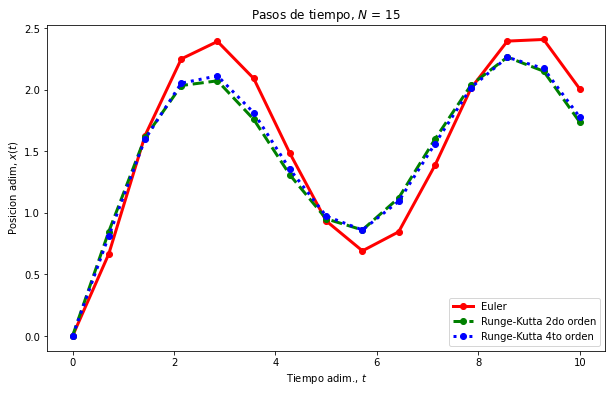

In [7]:
x_4RK = np.zeros(N) ## Runge-Kutta

def g(x_,t_):
    return np.cos(x_) + np.sin(t_)

for n in range(0,N-1):
    k1 = h*g( x_4RK[n]       , t[n]         )
    k2 = h*g( x_4RK[n] + k1/2, t[n] + (h/2) ) 
    k3 = h*g( x_4RK[n] + k2/2, t[n] + (h/2) ) 
    k4 = h*g( x_4RK[n] + k3  , t[n] +  h    )
    
    x_4RK[n+1] = x_4RK[n] + k1/6 + k2/3 + k3/3 + k4/6
    
plt.figure(figsize=(10,6))
plt.plot(t,x_Eu, '-ro' , linewidth=3.0,label=r'Euler')
plt.plot(t,x_imp,'--go', linewidth=3.0,label=r'Runge-Kutta 2do orden')
plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'Runge-Kutta 4to orden')
plt.ylabel(r'Posicion adim, $x(t)$')
plt.xlabel(r'Tiempo adim., $t$')
plt.title(r'Pasos de tiempo, $N$ = %i' % N)
plt.legend(loc=4) 
plt.show()

Podemos ver una diferencia marginal entre las implementaciones de Runge-Kutta de orden 2 y 4, mientras que el método de Euler tiene un error significativo. Recomendamos que ajustes el número total de puntos $N$, para ver como los distintos métodos se aproximan entre sí (y a la solución exacta) a medida que $h \overset{N \to \infty}{\longrightarrow} 0$.